In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = web.DataReader(a, data_source='yahoo',start='2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,44.058792,1132.989990
2010-01-05,44.073223,1136.520020
2010-01-06,43.864162,1137.140015
2010-01-07,43.626297,1141.689941
2010-01-08,43.568630,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-05-18,116.209999,2953.909912
2020-05-19,112.440002,2922.939941
2020-05-20,113.279999,2971.610107
2020-05-21,111.620003,2948.510010
2020-05-22,112.599998,2955.449951


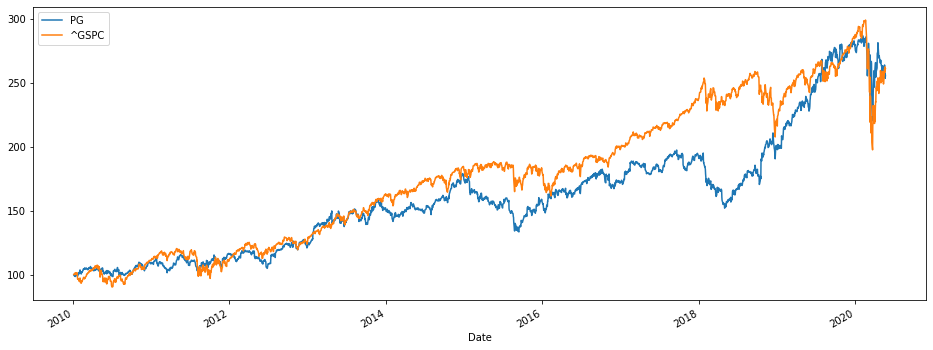

In [5]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(16,6));

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() *250

PG       0.089740
^GSPC    0.091698
dtype: float64

In [8]:
log_returns.head()

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004755,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878


In [9]:
# Covariance matrix
log_returns.cov()*250

,PG,^GSPC
PG,0.029497,0.017863
^GSPC,0.017863,0.030308


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597413
^GSPC,0.597413,1.000000


In [12]:
arr = np.random.random(2)
arr

array([0.10374398, 0.20208591])

In [13]:
arr[0]+arr[1]

0.30582988457641735

In [14]:
weights = np.random.random(2)
weights /= np.sum(weights)
weights

array([0.63224597, 0.36775403])

In [15]:
sum(weights)

1.0

#### Expected Portfolio Return:

In [16]:
np.sum(weights*log_returns.mean())*250

0.09045965626284777

#### Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.024196713356428312

#### Expected Portfolio Volatility:

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.15555292782981717

In [21]:
pfolio_returns = []
pfolio_vol = []

for x in range(1000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())* 250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() *250,weights))))
    
#pfolio_returns,pfolio_vol

In [22]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_vol})

In [23]:
portfolios.head()

,Return,Volatility
0,0.090458,0.155565
1,0.090554,0.154868
2,0.091575,0.169821
3,0.090698,0.154521
4,0.090811,0.154839


In [24]:
portfolios.tail()

,Return,Volatility
995,0.090579,0.154750
996,0.090498,0.155235
997,0.090796,0.154765
998,0.091323,0.162562
999,0.091114,0.158197


Text(0, 0.5, 'Expected Return')

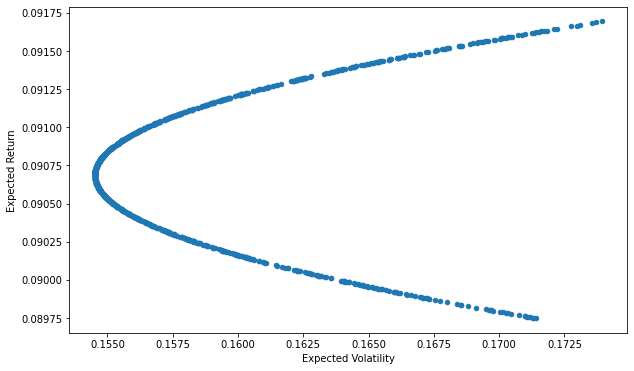

In [25]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')